# Load Data

In [2]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, time
import matplotlib.dates as mdates
from from_root import from_root
import os

In [3]:
# Set display options to show all rows in DataFrame, enable inline plotting, and suppress warnings
pd.set_option('display.max_rows', None)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Define the file path for the dataset
ultimate_data_path = os.path.join(from_root(),"data/ultimate_data_challenge.json")

# Load the dataset into a pandas DataFrame
ultimate_df = pd.read_json(ultimate_data_path)

In [5]:
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


**Let use ydata-profiling to look at the general report of the dataset.**

In [5]:
from ydata_profiling import ProfileReport
#profile_part3 = ProfileReport(ultimate_df)
#profile_part3.to_file('part3_profile_report.html')

In [6]:
#profile_part3.to_notebook_iframe()

## Create a "retained" column

**A retained customer is the one that is active in the last 30 days. Since we do not know when this dataset is obtained, we will use the latest day of the last_trip_date as a bench mark. So any customer that took a ride within 30 days of this bench mark date will be considered retained. Otherwise, the user will be considered as not retained**

In [7]:
# Determine the last timestamp in the dataset
ultimate_df['last_trip_date'].max()

'2014-07-01'

**We will set the  bench mark date as 2014-06-01 (30 days prior to 2014-07-01).**

In [8]:
# Create a new column 'retained' to indicate whether a user was active in the last 30 days
# (i.e., if their 'last_trip_date' was before June 1, 2014)
ultimate_df['retained'] = pd.to_datetime(ultimate_df['last_trip_date']) < pd.to_datetime('2014-06-01')

In [9]:
# Let look at the new dataframe
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,False
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,True
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,True
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,False
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,True


# EDA

## Addressing missing values

In [10]:
ultimate_df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
retained                     0
dtype: int64

**We will drop all the rows that contain at least one missing value.**

In [11]:
# Remove rows with missing values in 'avg_rating_of_driver', 'phone', or 'avg_rating_by_driver' columns
ultimate_df_cleaned = ultimate_df.dropna(subset = ['avg_rating_of_driver', 'phone', 'avg_rating_by_driver'])

In [12]:
# Double-check if there is any missing values
ultimate_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41445 entries, 0 to 49998
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   surge_pct               41445 non-null  float64
 8   ultimate_black_user     41445 non-null  bool   
 9   weekday_pct             41445 non-null  float64
 10  avg_dist                41445 non-null  float64
 11  avg_rating_by_driver    41445 non-null  float64
 12  retained                41445 non-null  bool   
dtypes: bool(2), float64(6), int64(1), object(4)
memory usage: 3.9+ MB


## Numerical Features

**Let look at the descriptive statistics of the numerical features.**

In [13]:
print(ultimate_df_cleaned.describe())

       trips_in_first_30_days  avg_rating_of_driver     avg_surge  \
count            41445.000000          41445.000000  41445.000000   
mean                 2.609675              4.601720      1.073822   
std                  4.059336              0.616104      0.198747   
min                  0.000000              1.000000      1.000000   
25%                  0.000000              4.300000      1.000000   
50%                  1.000000              4.900000      1.000000   
75%                  3.000000              5.000000      1.070000   
max                125.000000              5.000000      8.000000   

          surge_pct   weekday_pct      avg_dist  avg_rating_by_driver  
count  41445.000000  41445.000000  41445.000000          41445.000000  
mean       8.898709     61.254897      5.460046              4.776446  
std       18.322061     34.813848      5.145174              0.404606  
min        0.000000      0.000000      0.000000              1.000000  
25%        0.00000

**Let look at the distribution of the numerical features of retained or not retained customers.**

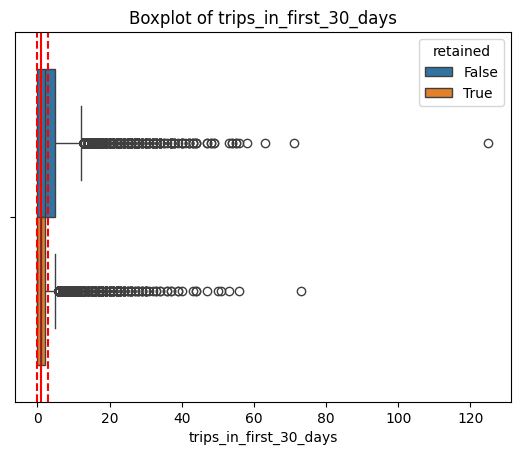

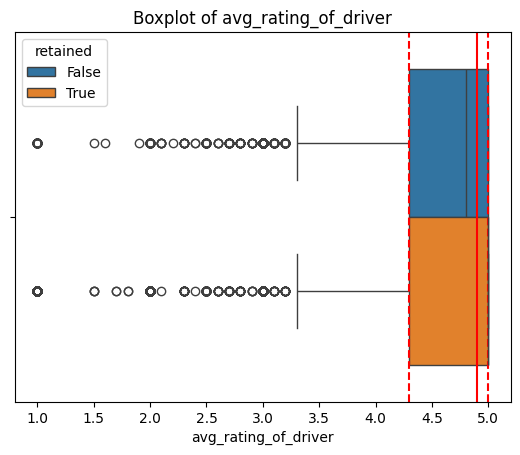

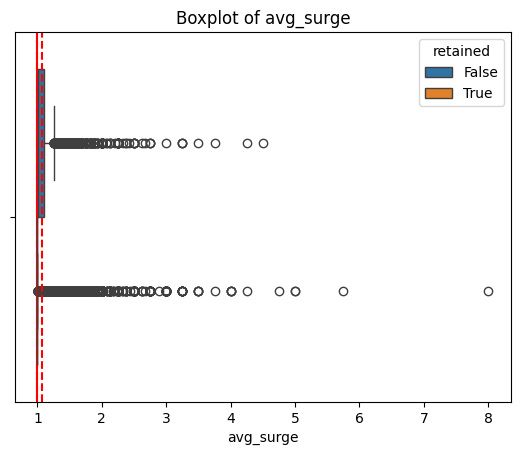

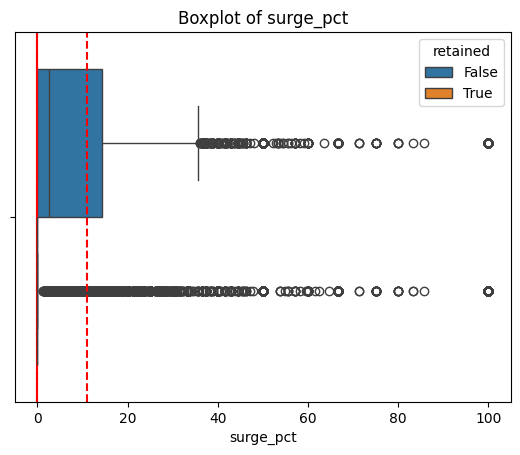

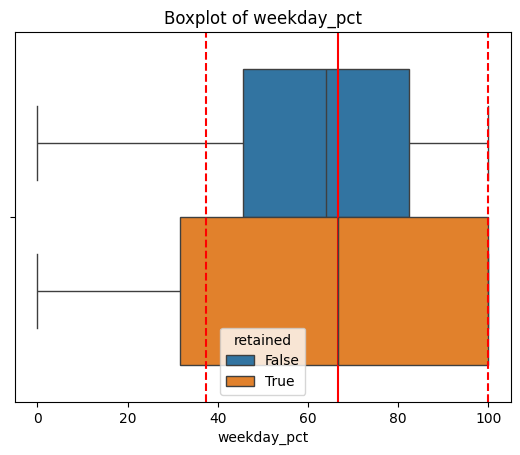

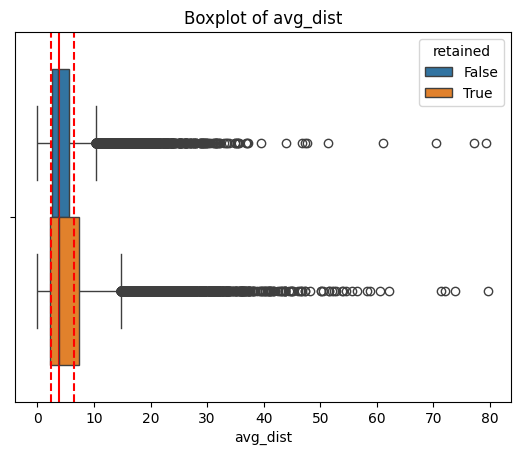

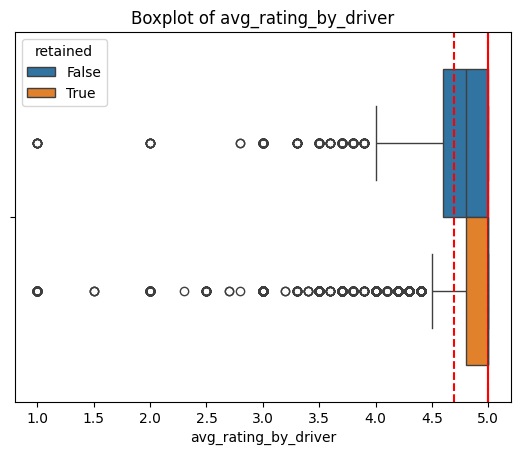

In [14]:
# Distribution plots for numerical columns
numerical_columns = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']
for column in numerical_columns:
    graph = sns.boxplot(data=ultimate_df_cleaned, x=column, hue='retained')

    #For each plot, we draw vertical lines of 25th, 50th, and 75th percentiles of the feature.
    col_25, col_50, col_75 = ultimate_df_cleaned[column].quantile([0.25, 0.5, 0.75])
    graph.axvline(col_25, color='r', linestyle="--")
    graph.axvline(col_50, color='r')
    graph.axvline(col_75, color='r', linestyle="--")
    plt.title(f'Boxplot of {column}')
    plt.show()

**Some interest insights from the numerical features:**
> **Retained customers tend to have higher average rating by drivers.**
>
> **Retained customers tend to have very low surge percentage.**

**We can print the descriptive statistics of the numerical features.**

* **retained customers**

In [15]:
for column in numerical_columns:
    print('{}'.format(column))
    print(ultimate_df_cleaned[ultimate_df_cleaned['retained']==True][column].describe())
    print("**********")

trips_in_first_30_days
count    24410.000000
mean         1.935477
std          2.914006
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         73.000000
Name: trips_in_first_30_days, dtype: float64
**********
avg_rating_of_driver
count    24410.000000
mean         4.607808
std          0.662614
min          1.000000
25%          4.300000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64
**********
avg_surge
count    24410.000000
mean         1.074517
std          0.229827
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: avg_surge, dtype: float64
**********
surge_pct
count    24410.000000
mean         8.728419
std         20.738757
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: surge_pct, dtype: float64
**********
weekday_pct
count    24410.000000
me

* **not retained customers.**

In [16]:
for column in numerical_columns:
    print('{}'.format(column))
    print(ultimate_df_cleaned[ultimate_df_cleaned['retained']==False][column].describe())
    print("**********")

trips_in_first_30_days
count    17035.000000
mean         3.575756
std          5.132168
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64
**********
avg_rating_of_driver
count    17035.000000
mean         4.592997
std          0.542454
min          1.000000
25%          4.300000
50%          4.800000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64
**********
avg_surge
count    17035.000000
mean         1.072826
std          0.142878
min          1.000000
25%          1.000000
50%          1.010000
75%          1.100000
max          4.500000
Name: avg_surge, dtype: float64
**********
surge_pct
count    17035.000000
mean         9.142724
std         14.154435
min          0.000000
25%          0.000000
50%          2.500000
75%         14.300000
max        100.000000
Name: surge_pct, dtype: float64
**********
weekday_pct
count    17035.000000
me

## Categorical Features

In [17]:
# Display the value counts for each categorical column to understand the distribution of categories
categorical_columns = ['city', 'phone', 'ultimate_black_user', 'retained']
for column in categorical_columns:
    print(ultimate_df_cleaned[column].value_counts())
    print("**********")

city
Winterfell        19161
Astapor           13509
King's Landing     8775
Name: count, dtype: int64
**********
phone
iPhone     29352
Android    12093
Name: count, dtype: int64
**********
ultimate_black_user
False    25526
True     15919
Name: count, dtype: int64
**********
retained
True     24410
False    17035
Name: count, dtype: int64
**********


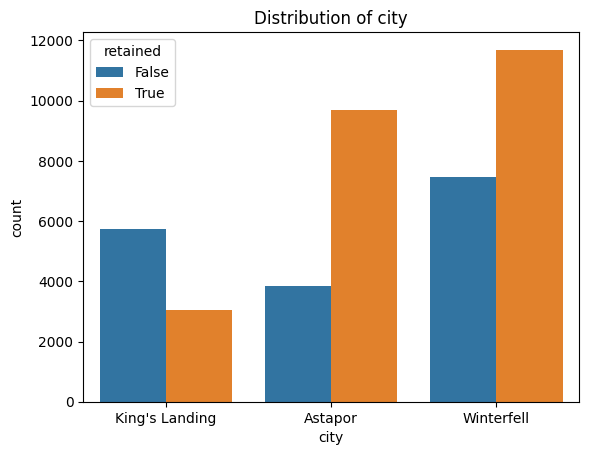

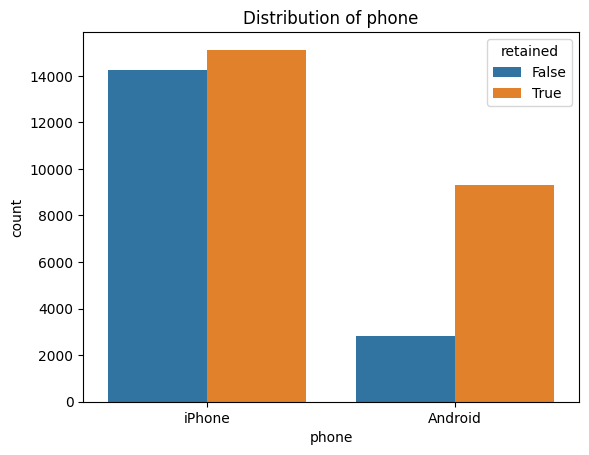

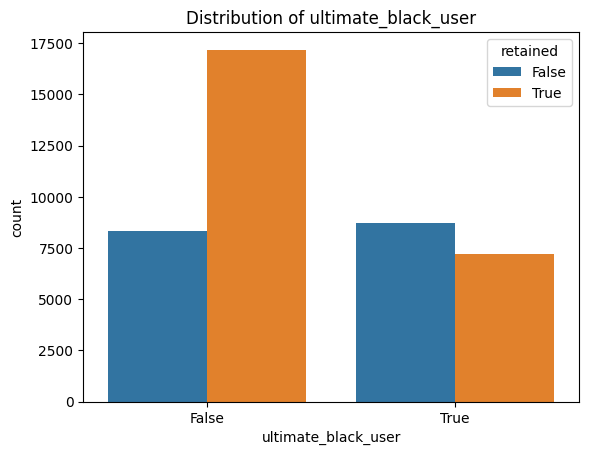

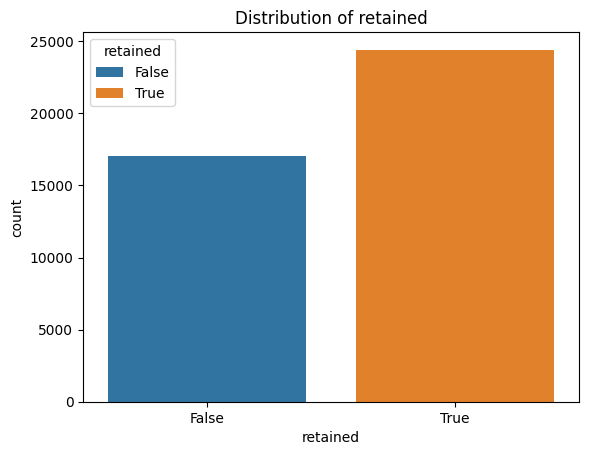

In [18]:
# Create count plots for each categorical column, showing the distribution of categories with respect to user retention
for column in categorical_columns:
    sns.countplot(x=column, data=ultimate_df_cleaned, hue='retained')
    plt.title(f'Distribution of {column}')  # Set the title for each plot to indicate the column being analyzed
    plt.show()  # Display the plot

**Some interesting insights from the categorical features:**
> **Customer from King's Landing has lower retained rate from other 2 city.**
>
> **Users of iPhone have lower rate of retain than those of Android.**
>
> **Ultimate Black users have lower rate of retain.**

## Datetime Features

In [19]:
# Convert 'signup_date' and 'last_trip_date' columns to datetime format for accurate date manipulation and analysis
ultimate_df_cleaned['signup_date'] = pd.to_datetime(ultimate_df_cleaned['signup_date'])
ultimate_df_cleaned['last_trip_date'] = pd.to_datetime(ultimate_df_cleaned['last_trip_date'])

# Modeling

## Data Preprocessing

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.compose import make_column_transformer

**Since the timespan of the dataset is about 6-month, we will not account for time series analysis. We will drop the two datetime columns.**
**However, before dropping the datetime columns, we will create new features which calculate the timespan from the date an account is open to the last trip day, and the lifespan of an account up to 2014-07-01**

In [22]:
# Calculate the duration between 'signup_date' and 'last_trip_date' and store it in a new column 'first_to_last'
ultimate_df_cleaned['first_to_last'] = ultimate_df_cleaned['last_trip_date'] -  ultimate_df_cleaned['signup_date']

In [23]:
# Convert the 'first_to_last' duration to the number of days for easier interpretation
ultimate_df_cleaned['first_to_last'] = ultimate_df_cleaned['first_to_last'].dt.days

In [24]:
# Calculate the age of each account as the difference between a reference date (July 1, 2014) and the 'signup_date'
# Store the result in a new column 'account_age' as the number of days
ultimate_df_cleaned['account_age'] = pd.to_datetime('2014-07-01') -  ultimate_df_cleaned['signup_date']
ultimate_df_cleaned['account_age'] = ultimate_df_cleaned['account_age'].dt.days

In [25]:
# Sort the DataFrame by 'account_age' in descending order and display the top rows to examine the oldest accounts

ultimate_df_cleaned.sort_values('account_age', ascending=False).head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,first_to_last,account_age
49973,Astapor,2,2014-01-01,4.0,1.00,2014-06-28,iPhone,0.0,True,25.0,4.07,5.0,False,178,181
3977,Astapor,3,2014-01-01,5.0,1.07,2014-04-07,Android,18.2,False,36.4,2.60,5.0,True,96,181
45398,Winterfell,0,2014-01-01,4.6,1.02,2014-06-30,iPhone,6.3,False,56.3,3.17,4.6,False,180,181
45362,Astapor,0,2014-01-01,4.7,1.00,2014-06-24,iPhone,0.0,False,68.8,3.68,4.9,False,174,181
45344,Winterfell,1,2014-01-01,4.0,1.00,2014-01-06,Android,0.0,False,100.0,3.64,3.0,True,5,181


**The goal of the predictive model is to predict if a customer is still retained after 6 month since the openning of the account. Therefore, we will only use the accounts that are more than 6 months old for the machine learning purpose.**

In [28]:
# Filter the DataFrame to create a new DataFrame 'learning_data' containing only accounts that are at least 180 days old
learning_data = ultimate_df_cleaned[ultimate_df_cleaned['account_age']>=180]

In [29]:
learning_data.shape

(2216, 15)

In [30]:
# Drop the 'signup_date', 'last_trip_date', and 'account_age' columns from the 'learning_data' DataFrame
# as they are no longer needed for analysis or modeling
learning_data = learning_data.drop(['signup_date','last_trip_date', 'account_age'], axis=1)

In [32]:
# Reset the index of the 'learning_data' DataFrame and drop the old index
# Display the top rows to verify the changes
learning_data.reset_index(drop=True).head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,first_to_last
0,King's Landing,0,5.0,1.17,iPhone,33.3,False,66.7,12.08,5.0,False,152
1,Astapor,0,4.0,1.00,iPhone,0.0,False,50.0,1.38,5.0,True,114
2,Winterfell,4,4.5,1.00,Android,0.0,False,52.4,3.24,5.0,True,120
3,King's Landing,0,5.0,1.00,iPhone,0.0,True,0.0,4.44,5.0,False,165
4,Astapor,1,5.0,1.00,Android,0.0,False,100.0,1.02,5.0,True,0


In [33]:
# Display a summary of the 'learning_data' DataFrame, including the number of entries, column names, data types, and memory usage
learning_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 19 to 49973
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    2216 non-null   object 
 1   trips_in_first_30_days  2216 non-null   int64  
 2   avg_rating_of_driver    2216 non-null   float64
 3   avg_surge               2216 non-null   float64
 4   phone                   2216 non-null   object 
 5   surge_pct               2216 non-null   float64
 6   ultimate_black_user     2216 non-null   bool   
 7   weekday_pct             2216 non-null   float64
 8   avg_dist                2216 non-null   float64
 9   avg_rating_by_driver    2216 non-null   float64
 10  retained                2216 non-null   bool   
 11  first_to_last           2216 non-null   int64  
dtypes: bool(2), float64(6), int64(2), object(2)
memory usage: 194.8+ KB


In [35]:
# Check the balance of the 'retained' variable in the 'learning_data' DataFrame
# by calculating the normalized value counts, which shows the proportion of each class
learning_data['retained'].value_counts(normalize=True)

retained
True     0.576264
False    0.423736
Name: proportion, dtype: float64

**The target variable is quite balance.**

In [36]:
# Preprocessing
# Encoding categorical variables using One-Hot Encoding with make_column_transformer
# This step transforms the 'city' and 'phone' columns into one-hot encoded format,
# while keeping other columns unchanged ('passthrough').

transformer = make_column_transformer(
    (OneHotEncoder(), ['city', 'phone']),
    remainder='passthrough'
)

# Apply the transformation to the 'learning_data' DataFrame and create a new DataFrame
transformed = transformer.fit_transform(learning_data)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

In [37]:
# Convert boolean values in 'remainder__ultimate_black_user' and 'remainder__retained' columns
# from True/False to 1/0 for easier numerical analysis
transformed_df['remainder__ultimate_black_user'].replace({True: 1, False: 0}, inplace=True)
transformed_df['remainder__retained'].replace({True: 1, False: 0}, inplace=True)

In [38]:
transformed_df.head()

,onehotencoder__city_Astapor,onehotencoder__city_King's Landing,onehotencoder__city_Winterfell,onehotencoder__phone_Android,onehotencoder__phone_iPhone,remainder__trips_in_first_30_days,remainder__avg_rating_of_driver,remainder__avg_surge,remainder__surge_pct,remainder__ultimate_black_user,remainder__weekday_pct,remainder__avg_dist,remainder__avg_rating_by_driver,remainder__retained,remainder__first_to_last
0,0.0,1.0,0.0,0.0,1.0,0,5.0,1.17,33.3,0,66.7,12.08,5.0,0,152
1,1.0,0.0,0.0,0.0,1.0,0,4.0,1.0,0.0,0,50.0,1.38,5.0,1,114
2,0.0,0.0,1.0,1.0,0.0,4,4.5,1.0,0.0,0,52.4,3.24,5.0,1,120
3,0.0,1.0,0.0,0.0,1.0,0,5.0,1.0,0.0,1,0.0,4.44,5.0,0,165
4,1.0,0.0,0.0,1.0,0.0,1,5.0,1.0,0.0,0,100.0,1.02,5.0,1,0


In [39]:
# Separating the target variable ('retained') from the feature set
# 'X' contains all features except the target variable,
# while 'y' contains the target variable ('remainder__retained') encoded as 1/0.
X = transformed_df.drop('remainder__retained', axis=1)
y = transformed_df['remainder__retained'].replace({True: 1, False: 0})

# Train-Test Split
# Split the data into training and testing sets with 20% of the data reserved for testing,
# using a fixed random state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Selection

**We will experiment with various algorithms using cross-validation on the training set to identify the most effective machine learning algorithm. After selecting the best model, we will make predictions on the test set and calculate the accuracy score of the final model.**

**Next, we will implement a deep learning approach using a neural network and compare its performance against the other algorithms.**

**The evaluation metric will be the accuracy score.**

**Additionally, we will extract the feature importance scores to identify which features have the greatest impact on the decision to retain the service.**

### ML Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, make_scorer, accuracy_score, confusion_matrix

In [53]:
# Create a machine learning pipeline
pipeline = Pipeline([
    ('scaler', Normalizer()),  # Step 2a: Scale the data using Normalizer
    ('classifier', RandomForestClassifier())  # Step 2b: Initialize a classification algorithm (default to RandomForest)
])

# List of classifiers to evaluate with cross-validation
classifiers = [
    ('MultinomialNB', MultinomialNB()),
    ('SVM', LinearSVC(C=0.0001)),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('KNeighbors', KNeighborsClassifier(algorithm='brute', n_jobs=-1)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Bagging', BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=10)),
    ('AdaBoost', AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10, max_depth=4), n_estimators=10, learning_rate=0.6)),
    ('Random Forest', RandomForestClassifier(n_estimators=30, max_depth=9)),
    ('Voting', VotingClassifier(estimators=[('mnb', MultinomialNB()), ('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svm', LinearSVC())], voting='hard'))
]

# Perform cross-validation for each classifier
for clf_name, clf in classifiers:
    pipeline.set_params(classifier=clf)  # Update the classifier in the pipeline
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(accuracy_score))

    # Output cross-validation results
    print(f"{clf_name} - Cross-validation scores: {cv_scores}")
    print(f"{clf_name} - Mean accuracy: {cv_scores.mean()}\n")


MultinomialNB - Cross-validation scores: [0.62253521 0.63380282 0.59039548 0.60169492 0.58757062]
MultinomialNB - Mean accuracy: 0.6071998090236332



SVM - Cross-validation scores: [0.57746479 0.57746479 0.57627119 0.57627119 0.57627119]
SVM - Mean accuracy: 0.5767486273573645



Logistic Regression - Cross-validation scores: [0.78591549 0.82535211 0.79096045 0.76836158 0.80508475]
Logistic Regression - Mean accuracy: 0.7951348770589639



KNeighbors - Cross-validation scores: [0.86478873 0.88450704 0.88983051 0.86440678 0.89830508]
KNeighbors - Mean accuracy: 0.8803676295058486



Decision Tree - Cross-validation scores: [0.95774648 0.98028169 0.96892655 0.97457627 0.97457627]
Decision Tree - Mean accuracy: 0.9712214530118566



Bagging - Cross-validation scores: [0.95774648 0.97746479 0.97457627 0.96610169 0.97457627]
Bagging - Mean accuracy: 0.9700931009787539



AdaBoost - Cross-validation scores: [0.96619718 0.97746479 0.98870056 0.97740113 0.98305085]
AdaBoost - Mean accuracy: 0

**Random Forest provides the best cross-validation score.**
**We will create a classification model with Random Forrest.**

In [59]:
# Scale the training and testing feature sets using Normalizer
# 'scale1' is applied to the training data, transforming it into a normalized format
X_train_scaled = scale1.fit_transform(X_train)

# 'scale2' is applied to the testing data, transforming it into a normalized format
X_test_scaled = scale2.fit_transform(X_test)


In [62]:
# Initialize the Random Forest classifier with 100 estimators and a fixed random state for reproducibility
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the classifier's performance by calculating accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9842342342342343
Confusion Matrix:
[[184   5]
 [  2 253]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       189
           1       0.98      0.99      0.99       255

    accuracy                           0.98       444
   macro avg       0.98      0.98      0.98       444
weighted avg       0.98      0.98      0.98       444



### Features Importance

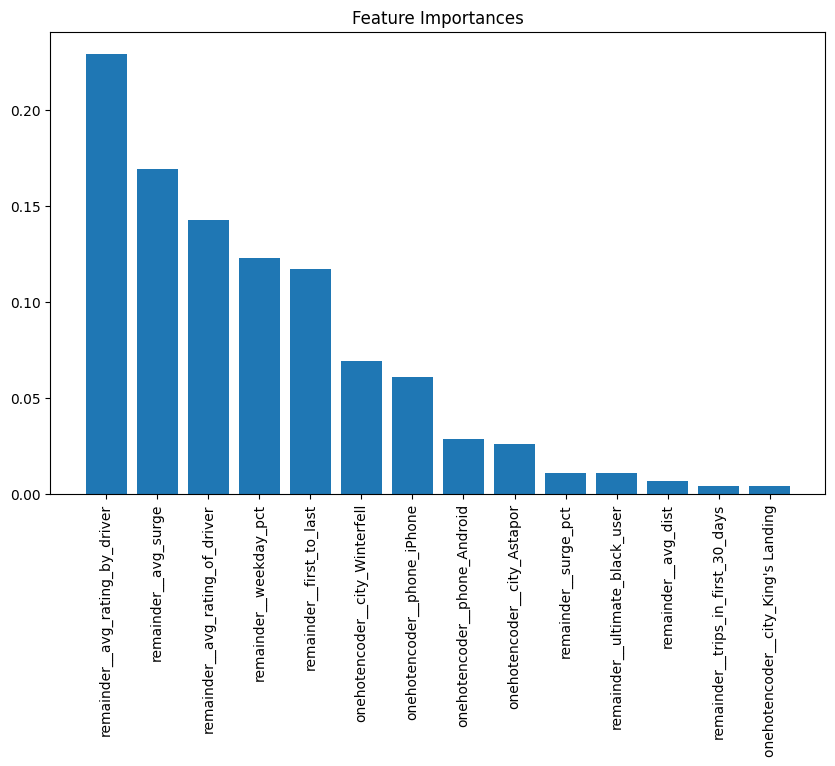

In [74]:
# Retrieve the feature importances from the trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Get the corresponding feature names from the original training data
feature_names = X_train.columns

# Sort the feature importances in descending order to identify the most important features
indices = feature_importances.argsort()[::-1]

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)  # Label the x-axis with feature names
plt.title("Feature Importances")  # Set the title of the plot
plt.show()  # Display the plot

### Deep Learning

In [58]:
# Neural Network Model
# Split the scaled training data into partial training and validation sets
x_partial_train, x_validation, y_partial_train, y_validation = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Initialize the Sequential model for the neural network
model = models.Sequential()

# Add layers to the model
model.add(layers.Dense(16, activation='relu', input_shape=(x_partial_train.shape[1],)))  # Input layer
model.add(layers.Dense(16, activation='relu'))  # Hidden layer
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model with the RMSprop optimizer, binary crossentropy loss, and accuracy as a metric
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the partial training data for 4 epochs with a batch size of 512,
# and validate on the validation set
model.fit(x_partial_train, y_partial_train, epochs=4, batch_size=512, validation_data=(x_validation, y_validation))

# Evaluate the model on the test set and print the accuracy score
print("Score on test: " + str(model.evaluate(X_test_scaled, y_test)[1]))
# Evaluate the model on the training set and print the accuracy score
print("Score on train: " + str(model.evaluate(X_train_scaled, y_train)[1]))

Epoch 1/4
3/3 [==============================] - 3s 301ms/step - loss: 0.7055 - accuracy: 0.4968 - val_loss: 0.6576 - val_accuracy: 0.6085
Epoch 2/4
3/3 [==============================] - 0s 61ms/step - loss: 0.6770 - accuracy: 0.5681 - val_loss: 0.6399 - val_accuracy: 0.6676
Epoch 3/4
3/3 [==============================] - 0s 49ms/step - loss: 0.6581 - accuracy: 0.6309 - val_loss: 0.6256 - val_accuracy: 0.7099
Epoch 4/4
14/14 [==============================] - 0s 15ms/step - loss: 0.6309 - accuracy: 0.6824
score on test: 0.6824324131011963
56/56 [==============================] - 1s 20ms/step - loss: 0.6288 - accuracy: 0.6874
score on train: 0.6873589158058167


**The neural network in this case perform much worse than the other machine learning methods.**

# Future Works

* **Perform Hyper-parameter tuning for a better predictive model.**
* **Consider model runtime to determine model accuracy trade off.**
* **Perform hypothetical prediction for the accounts that are less than 6-month old.**
* **Improve products based on the features importance information from the model.**